In [80]:
from transformers import BertTokenizer, BertModel,RobertaModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('tweets_cleaned.csv')
df.drop(columns=['timestamp','username','handle','tweet_date','content','content_ment_link','content_wo_punct','content_wo_removed_english','content_wo_normalize','content_wo_tokenize','content_wo_stop','content_wo_lemmatized'], inplace=True)
df.head()

,content_no_rare_words
0,"['hep', 'razı', 'var', 'deprem']"
1,"['o', 'dayan', 'güc', 'ver', 'deprem']"
2,"['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'..."
3,['deprem']
4,"['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan..."


# Cosine Similarity Example

## How Does [CLS] Work in BERT?
## Tokenization: Suppose we have a simple sentence like:
## “The sky is clear and blue.”
## 2. Before processing, BERT adds [CLS] and [SEP] to the sentence:

## [CLS] The sky is clear and blue. [SEP]
## 3. Then, BERT tokenizes the words, converting them into a format it can process — typically embeddings, which are vector representations of each token in a multi-dimensional space.

## Embedding Through Transformer Layers: Each token in this sequence, including [CLS], is passed through BERT’s transformer layers. These layers use attention mechanisms to allow each token to “attend” to every other token in the sequence. As this happens, each token's ## vector representation is updated to capture richer and more complex relationships.
## Role of [CLS]: Since the [CLS] token is the first position in the sequence, it captures a summary representation of the entire sentence (or sentences) after passing through all the transformer layers. This means that the final vector representation of [CLS] contains ## the context of the whole sentence, making it highly useful for classification tasks or tasks requiring sentence-level understanding.

In [28]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy() # [CLS] token: [CLS] at the start, signaling the beginning and “summary” position of the sentence.
    return embeddings

text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

embedding1 = get_bert_embeddings(text1)
embedding2 = get_bert_embeddings(text2)

similarity = cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity[0][0]:.4f}")

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.8782


# Sentence Transformers Embedding

In [30]:
model = SentenceTransformer('paraphrase-MPNet-base-v2')

text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

embedding1 = model.encode(text1)
embedding2 = model.encode(text2)

# Cosine Similarity hesaplama
similarity = cosine_similarity([embedding1], [embedding2])
print(f"Cosine Similarity: {similarity[0][0]:.4f}")

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.4315


# Sentence Transformers Optimize

In [ ]:
models = [
    'all-MiniLM-L6-v2',  
    'paraphrase-MiniLM-L6-v2',  
    'paraphrase-distilroberta-base-v1',  
    'distilbert-base-nli-stsb-mean-tokens',
    'roberta-large-nli-stsb-mean-tokens', 
    'paraphrase-xlm-r-multilingual-v1',  
    'paraphrase-albert-small-v2',  
    'distilroberta-base-paraphrase-v1',  
    'bert-base-nli-mean-tokens',  
    'bert-large-nli-mean-tokens', 
    'roberta-base-nli-stsb-mean-tokens', 
    'xlm-r-large-en-fr',
    'xlm-r-base-en',
    'paraphrase-mpnet-base-v2',
    'paraphrase-distilbert-base-v1',  
    'paraphrase-albert-large-v2',  
    'paraphrase-xlm-r-mlm-v1',  
    'sentence-transformers/bert-base-nli-cls-token',
]

In [34]:
text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

In [ ]:
for model_name in models:
    model = SentenceTransformer(model_name) 
    
    embedding1 = model.encode(text1)
    embedding2 = model.encode(text2)
    
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    print(f"Model: {model_name}, Cosine Similarity: {similarity:.4f}")
    

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model: all-MiniLM-L6-v2, Cosine Similarity: 0.3602


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_

Model: paraphrase-MiniLM-L6-v2, Cosine Similarity: 0.2004


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-distilroberta-base-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\toke

Model: paraphrase-distilroberta-base-v1, Cosine Similarity: 0.4915


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--distilbert-base-nli-stsb-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\

Model: distilbert-base-nli-stsb-mean-tokens, Cosine Similarity: 0.5729


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--roberta-large-nli-stsb-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\to

Model: roberta-large-nli-stsb-mean-tokens, Cosine Similarity: 0.7782


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-xlm-r-multilingual-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\toke

Model: paraphrase-xlm-r-multilingual-v1, Cosine Similarity: 0.0890


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-albert-small-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenizati

Model: paraphrase-albert-small-v2, Cosine Similarity: 0.3653


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--distilroberta-base-paraphrase-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


AttributeError: add_special_tokens conflicts with the method add_special_tokens in RobertaTokenizerFast

## Select Model And Test

In [56]:
labels = {
    "acil": "acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, deprem hakkında bilgi",
    "destek": "destek, yardım talepleri, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}

In [57]:
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [58]:
def get_closest_label(text):
    text_embedding = model.encode(text)
    label_embeddings = {label: model.encode(rep) for label, rep in labels.items()}
    similarities = {label: cosine_similarity([text_embedding], [embedding])[0][0] for label, embedding in label_embeddings.items()}
    sorted_labels = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels

In [59]:
example_text = "Deprem sonrası büyük bir yardım organizasyonu yapmamız gerekiyor, insanlar yardım bekliyor."
result = get_closest_label(example_text)
print("Cümleye en yakın etiketler:")
for label, sim in result:
    print(f"{label}: {sim:.4f}")

Cümleye en yakın etiketler:
acil: 0.6225
çok acil: 0.4960
destek: 0.4303
bilgilendirme: 0.4202


# Calculate 

In [71]:
labels = {
    "acil": "deprem,acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, bilgi, uyarı",
    "destek": "destek, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}
label_embeddings = {label: model.encode(rep) for label, rep in labels.items()}

In [72]:
def get_closest_label(text_tokens):
    text = " ".join(text_tokens)
    text_embedding = model.encode(text)
    similarities = {label: cosine_similarity([text_embedding], [embedding])[0][0] for label, embedding in label_embeddings.items()}
    sorted_labels = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels

for index, row in df.iterrows():
    text_tokens = row["content_no_rare_words"]  
    closest_labels = get_closest_label(text_tokens)
    df.loc[index, "label_cosine_similarity"] = closest_labels[0][0]  

print(df.head())  

                               content_no_rare_words predicted_label  \
0                   ['hep', 'razı', 'var', 'deprem']          destek   
1             ['o', 'dayan', 'güc', 'ver', 'deprem']          destek   
2  ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...          destek   
3                                         ['deprem']          destek   
4  ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek   

  label_cosinus_similarity label_cosine_similarity  
0                   destek                  destek  
1                   destek           bilgilendirme  
2                   destek           bilgilendirme  
3                   destek           bilgilendirme  
4                   destek                  destek  


## K Means

In [75]:
def get_embeddings_from_tokens(tokens):
    sentence = " ".join(tokens)
    return model.encode([sentence])[0]

In [82]:
text_embeddings = np.array([get_embeddings_from_tokens(tokens) for tokens in df['content_no_rare_words']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(text_embeddings)
df['cluster_label'] = kmeans.labels_
print(df)

                                  content_no_rare_words predicted_label  \
0                      ['hep', 'razı', 'var', 'deprem']          destek   
1                ['o', 'dayan', 'güc', 'ver', 'deprem']          destek   
2     ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...          destek   
3                                            ['deprem']          destek   
4     ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek   
...                                                 ...             ...   
1990  ['kader', 'gün', 'ada', 'hatay', 'deprem', 'de...             NaN   
1991  ['tanı', 'şeref', 'öğretmen', 'içinde', 'güzel...             NaN   
1992  ['mesaj', 'alın', 'mahalle', 'yol', 'site', 'b...             NaN   
1993  ['ülke', 'deprem', 'konu', 'anlat', '“', '”', ...             NaN   
1994  ['bebek', 'yardımcı', 'enkaz', 'alt', 'gör', '...             NaN   

     label_cosinus_similarity label_cosine_similarity  cluster_label  
0                      deste

C:\Users\Enes\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


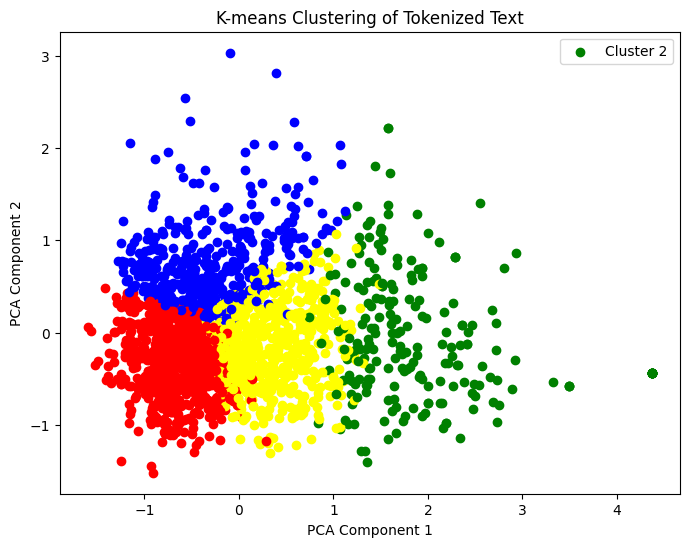

In [83]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(text_embeddings)
colors = ['red', 'blue', 'green','yellow']

# Matplotlib ile görselleştirme
plt.figure(figsize=(8, 6))
for i in range(len(df)):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], 
                color=colors[df.loc[i, 'cluster_label']], 
                label=f"Cluster {df.loc[i, 'cluster_label']}" if i == 0 else "")
    
plt.title("K-means Clustering of Tokenized Text")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Küme etiketlerini göster
plt.legend()
plt.show()

In [86]:
df

,content_no_rare_words,label_cosine_similarity,cluster_label
0,"['hep', 'razı', 'var', 'deprem']",destek,2
1,"['o', 'dayan', 'güc', 'ver', 'deprem']",bilgilendirme,3
2,"['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...",bilgilendirme,0
3,['deprem'],bilgilendirme,2
4,"['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...",destek,3
...,...,...,...
1990,"['kader', 'gün', 'ada', 'hatay', 'deprem', 'de...",bilgilendirme,3
1991,"['tanı', 'şeref', 'öğretmen', 'içinde', 'güzel...",bilgilendirme,3
1992,"['mesaj', 'alın', 'mahalle', 'yol', 'site', 'b...",bilgilendirme,0
1993,"['ülke', 'deprem', 'konu', 'anlat', '“', '”', ...",bilgilendirme,3


In [88]:
def label_clusters(cluster_label):
    if cluster_label == 0:
        return 'çok acil'
    elif cluster_label == 1:
        return 'acil'
    elif cluster_label == 2:
        return 'Bilgilendirme'
    elif cluster_label == 3:
        return 'destek'

df['label'] = df['cluster_label'].apply(label_clusters)


In [89]:
df.to_csv('tweets_with_labels.csv', index=False)

# Embedding

In [10]:
def get_bert_embeddings_from_tokens(tokens):
    inputs = tokenizer(tokens, is_split_into_words=True, return_tensors='pt', padding=True, truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
    
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()

    return embeddings

In [70]:
labels = {
    "acil": "deprem,acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, bilgi, uyarı",
    "destek": "destek, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}
label_embeddings = {label: get_bert_embeddings_from_tokens(text.split()) for label, text in labels.items()}

NameError: name 'get_bert_embeddings_from_tokens' is not defined

In [ ]:
for index, row in df.iterrows():
    text_tokens = row["content_no_rare_words"] 
    text_embedding = get_bert_embeddings_from_tokens(text_tokens)
    
    similarities = {label: cosine_similarity(text_embedding, label_embedding)[0][0] for label, label_embedding in label_embeddings.items()}
    predicted_label = max(similarities, key=similarities.get)
    df.loc[index, "predicted_label"] = predicted_label

In [19]:
print(df[['content_no_rare_words', 'predicted_label']].head())

                               content_no_rare_words predicted_label
0          ['hep', 'allah', 'razı', 'var', 'deprem']   bilgilendirme
1    ['allah', 'o', 'dayan', 'güc', 'ver', 'deprem']   bilgilendirme
2  ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...            acil
3                                         ['deprem']   bilgilendirme
4  ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek


In [87]:
df.to_csv('tweets_with_labels.csv', index=False)